In [1]:
import matplotlib
#matplotlib.use('Agg')

%load_ext autoreload
%autoreload 2

# %matplotlib tk
%autosave 180
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import os
os.chdir('/home/cat/code/widefield/')
import umap
import parmap
import scipy

import glob2
import numpy as np
from sklearn.decomposition import PCA

# visualize results module
# from visualize import Visualize
# from Visualize import PCA_Analysis
from visualize import visualize

import pickle as pk
from sklearn.linear_model import LinearRegression

# 
#data_dir = '/media/cat/4TBSSD/yuki/'
data_dir = '/media/cat/4TBSSD/yuki/'


Autosaving every 180 seconds


<ipython-input-1-e99e67252288>:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [6]:
##################################################
######### PROCESS CONVEX HULL FOR ALL DATA #######
##################################################

# ************** FIG 2E Convex hull analysis

root_dir = '/media/cat/4TBSSD/yuki/'

animal_ids = ['IA1','IA2','IA3','IJ1',"IJ2","AQ2"]
session_id = 'all'

# 
for animal_id in animal_ids:
    pa = visualize.PCA_Analysis()
    pa.root_dir = '/media/cat/4TBSSD/yuki/'
    pa.session_id = 'all'
    pa.animal_id = animal_id

    # 
    pa.n_pca = 10
    pa.sliding_window = 30    # how many frames to take into analysis window
    pa.n_frames = 300         # how many frames back in time to analyze: 

    
    # 
    sessions = visualize.get_sessions(pa.root_dir,
                            pa.animal_id,
                            pa.session_id)


    for session in sessions:
        pa.session = session
        print (" processing: ", session)
        fname_out = os.path.join(pa.root_dir,
                                  pa.animal_id,
                                  'tif_files',
                                  pa.session,
                                  pa.session+'_convex_hull.npz')
        if os.path.exists(fname_out):
            print ("     data laready processed")
            print ('')
            continue
            
#         fname_triggers = os.path.join(pa.root_dir,
#                                       pa.animal_id,
#                                       'tif_files',
#                                       pa.session,
#                                       'blue_light_frame_triggers.npz')

#         fname_data = os.path.join(pa.root_dir,
#                                      pa.animal_id,
#                                      'tif_files',
#                                      pa.session,
#                                      pa.session+ '_aligned_butterworth_0.1hz_6.0hz.npy')

        #pa.X, pa.triggers = get_data_and_triggers(fname_triggers,
        #                                          fname_data)

        pa.X, pa.triggers = get_data_and_triggers(pa)
        
        if pa.X is None:
            print ("     missing data/blue light")
            print ('')
            print ('')
            continue
            
        if pa.triggers.shape[0]<5:
            print ("     not enough points : ", pa.triggers.shape )
            print ('')
            print ('')
            continue
            
        # make PCA plots
        pa.pca, pa.all_points = get_pca_object_and_all_points(pa)


        # FIG 2 E top
        pa.p_lever =  project_data_pca(pa)

        # skip plotting option
        # plot_pca_scatter(pa)
         
        # FIG 2E
        pa =  get_convex_hull(pa)

        # skip plotting option
        # plot_convex_hull(pa)
        print ('')


 processing:  IA1pm_Feb1_30Hz


AttributeError: 'PCA_Analysis' object has no attribute 'get_data_and_triggers'

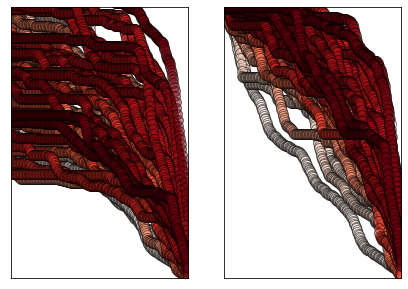

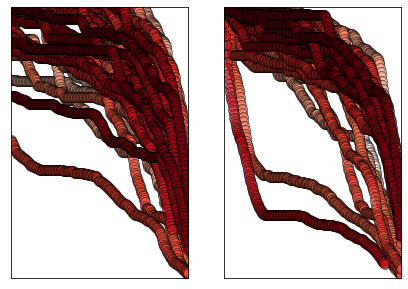

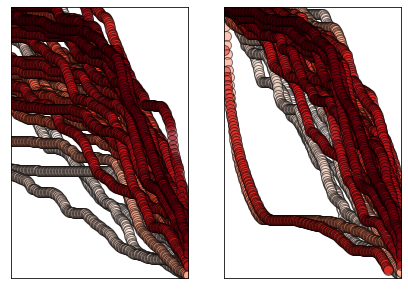

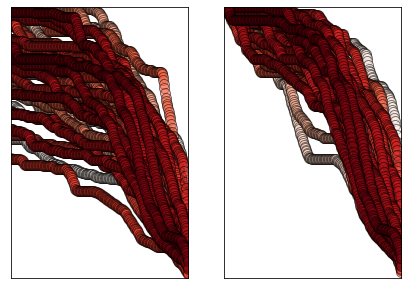

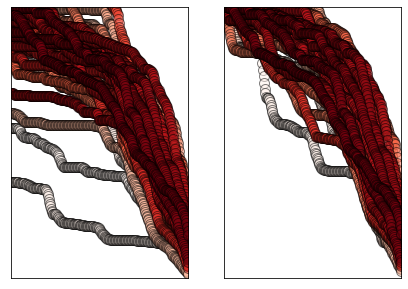

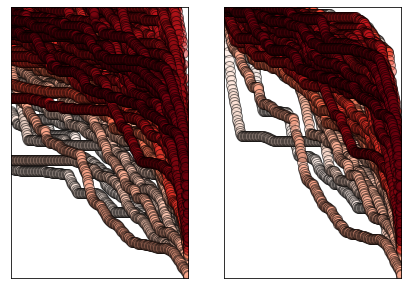

In [ ]:
#############################################################################################
#### STAND ALONE FUNCTION TO PLOT LONGITUDINAL CONVEX HULL - MULTRIPLE RED CURVE PLOT #######
#############################################################################################
animal_ids = ['IA1','IA2','IA3','IJ1',"IJ2","AQ2"]
clrs = ['black','blue','red','green','magenta','pink']

aucs = []
aucs_norm = []

#animal_ids = ['AQ2']
plotting = False
for ctr_animal, animal_id in enumerate(animal_ids):
    
    #
    aucs.append([])
    aucs_norm.append([])
    
    #
    pa = visualize.PCA_Analysis()
    pa.root_dir = '/media/cat/4TBSSD/yuki/'
    pa.session_id = 'all'
    pa.animal_id = animal_id

    # 
    sessions = visualize.get_sessions(pa.root_dir,
                                      pa.animal_id,
                                      pa.session_id)
    #
    cmap = matplotlib.cm.get_cmap('Reds')

    clr_ctr=0
    n_sessions = len(sessions)
    alpha = .5

    if plotting:
        fig=plt.figure(figsize=(7,5))
        
    # 
    for session in sessions:
        #print ('session:', session)
        # 
        fname = os.path.join(pa.root_dir, pa.animal_id,'tif_files',session,
                            session+ '_convex_hull.npz')
        # fname = '/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb2_30Hz/IA1pm_Feb2_30Hz_convex_hull.npz'
        try:
            d = np.load(fname, allow_pickle = True)
        except:
            clr_ctr+=1
            continue

        # pa.ratio_single = d['ratio_single'][::-1]
        pa.ratio_cumsum = d['ratio_cumsum'][::-1]
        # pa.ratio_random_single = d['ratio_random_single'][::-1]
        # pa.ratio_random_cumulative = d['ratio_random_cumulative'][::-1]

        # 
        if plotting:
            visualize.plot_convex_hull_cumulative_only(pa,
                                         cmap,
                                         clr_ctr/n_sessions,
                                         alpha)


        # 
        #plot_convex_hull_single_only(pa,
        #                            cmap,
        #                            clr_ctr/n_sessions,
        #                            alpha)
        clr_ctr+=1


        aucs[ctr_animal].append(pa.ratio_cumsum.sum())
        aucs_norm[ctr_animal].append((pa.ratio_cumsum/np.max(pa.ratio_cumsum)).sum())

    if plotting:
        if False:
            plt.savefig('/home/cat/convex_hull_'+str(animal_id)+'.svg',dpi=1200)
            plt.close()
        else:
            plt.show()

if False:
    np.save('/home/cat/aucs_norm.npy',aucs_norm)
    np.save('/home/cat/aucs.npy',aucs)

cor:  (0.5615654667114519, 4.51363087174788e-06)
cor:  (-0.05548145979729132, 0.7553071371489104)
cor:  (0.24489473472745507, 0.11802641601084893)
cor:  (-0.11573459960062614, 0.4711727435851725)
cor:  (0.2806744174726347, 0.08349377597229266)
cor:  (0.48088641573161484, 4.193891754569929e-06)


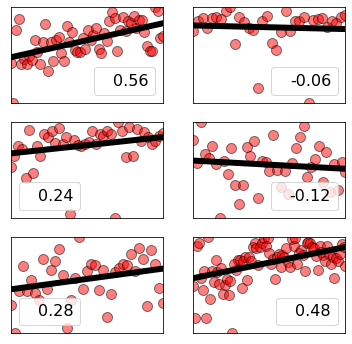

In [3]:
#########################################################
######## SCATTER PLOT OF TRENDS IN CONVEX HULL ##########
#########################################################
# plot AUC  <--------------------  MUST RUN PREVIOUS CELL TO GET THE AUCS FIRST -------------

#
clrs = ['black','blue','red','green','magenta','pink']
animal_ids = ['M1','M2','M3','M4','M5','M6']

sig = [0.05,0.01,0.001, 0.0001, 0.00001]
fig = plt.figure(figsize=(6,6))
aucs_norm = np.load('/home/cat/aucs_norm.npy',allow_pickle=True)
aucs = np.load('/home/cat/aucs.npy',allow_pickle=True)
for k in range(len(aucs)):
    ax=plt.subplot(3,2,k+1)
    
    temp = aucs_norm[k]
    plt.scatter(np.arange(len(temp)), temp,
                c='red',
                edgecolor='black',
                s=100,
                alpha=.5)

    x = np.arange(len(temp))
    corr = scipy.stats.pearsonr(x,temp)
    print ("cor: ", corr)

    
    # fit
    model = LinearRegression()
    y=np.array(temp).reshape(-1, 1)
    x = np.arange(y.shape[0]).reshape(-1, 1)
    model.fit(x, y)

    x2 = np.arange(0,y.shape[0],1).reshape(-1, 1)
    y_pred = model.intercept_ + model.coef_ * x2

    #
    
    
    #t,p = find_p_t(model, x, y, x2, y_pred)
    
#     temp_sig = ''
#     for j in range(len(sig)):
#         if p <= sig[j]:
#             temp_sig = temp_sig+"*"
            
    
    plt.plot(x2, y_pred, label= str(round(corr[0],2)),
             c='black',
             linewidth=6)
    
    
    
    legend = plt.legend(handlelength=0, fontsize=16)        
    #plt.legend(fontsize=12)
    plt.xlim(x[0],x[-1])
    plt.ylim(np.min(y), np.max(y))
    #print (" COMPUTE PEARSON CORR NOT T-TEST ON FIT")
    #print (np.min(y), np.max(y))
    #plt.ylim(0,2)

    plt.xticks([])
    plt.yticks([])

if False:
    plt.savefig('/home/cat/convex_hull_fits.svg')
    plt.close()
else:
    plt.show()

In [1]:
clrs = ['black','blue','red','green','magenta','pink']
animal_ids = ['M1','M2','M3','M4','M5','M6']

sig = [0.05,0.01,0.001, 0.0001, 0.00001]
fig = plt.figure(figsize=(6,6))
aucs_norm = np.load('/home/cat/aucs_norm.npy',allow_pickle=True)
aucs = np.load('/home/cat/aucs.npy',allow_pickle=True)
for k in range(len(aucs)):
    ax=plt.subplot(3,2,k+1)
    
    temp = aucs_norm[k]
    plt.scatter(np.arange(len(temp)), temp,
                c='red',
                edgecolor='black',
                s=100,
                alpha=.5)

    x = np.arange(len(temp))
    corr = scipy.stats.pearsonr(x,temp)
    print ("cor: ", corr)

    
    # fit
    model = LinearRegression()
    y=np.array(temp).reshape(-1, 1)
    x = np.arange(y.shape[0]).reshape(-1, 1)
    model.fit(x, y)

    x2 = np.arange(0,y.shape[0],1).reshape(-1, 1)
    y_pred = model.intercept_ + model.coef_ * x2

    #
    
    
    #t,p = find_p_t(model, x, y, x2, y_pred)
    
#     temp_sig = ''
#     for j in range(len(sig)):
#         if p <= sig[j]:
#             temp_sig = temp_sig+"*"
            
    
    plt.plot(x2, y_pred, label= str(round(corr[0],2)),
             c='black',
             linewidth=6)
    
    
    
    legend = plt.legend(handlelength=0, fontsize=16)        
    #plt.legend(fontsize=12)
    plt.xlim(x[0],x[-1])
    plt.ylim(np.min(y), np.max(y))
    #print (" COMPUTE PEARSON CORR NOT T-TEST ON FIT")
    #print (np.min(y), np.max(y))
    #plt.ylim(0,2)

    plt.xticks([])
    plt.yticks([])

if False:
    plt.savefig('/home/cat/convex_hull_fits.svg')
    plt.close()
else:
    plt.show()
    


NameError: name 'plt' is not defined

100%|██████████| 38908/38908 [00:00<00:00, 928134.20it/s]

Times:  30 0
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)
 X data using :  30  number of frames  (38908, 900)


 done fit 


triaging activity: 100%|██████████| 30/30 [00:00<00:00, 1460.07it/s]

all points denoised:  (38908, 20)
30 44 20
plever:  (30, 44, 20)
all points pre triage:  (38908, 20)



100%|██████████| 38908/38908 [00:00<00:00, 1139004.30it/s]

all points post triage:  (35017, 20)
computing hull of all points... (35017, 2)
Times:  40 10
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 


  0%|          | 0/38908 [00:00<?, ?it/s]

all points denoised:  (38908, 20)
30 44 20
plever:  (30, 44, 20)
Times:  50 20
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


100%|██████████| 38908/38908 [00:00<00:00, 879072.94it/s]


 X data using :  30  number of frames  (38908, 900)
 done fit 


100%|██████████| 38908/38908 [00:00<00:00, 1165740.27it/s]

all points denoised:  (38908, 20)
30 44 20
plever:  (30, 44, 20)
Times:  60 30
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 


100%|██████████| 38908/38908 [00:00<00:00, 1111639.27it/s]

all points denoised:  (38908, 20)
30 44 20
plever:  (30, 44, 20)
Times:  70 40
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 


  0%|          | 0/38908 [00:00<?, ?it/s]

all points denoised:  (38908, 20)
30 44 20
plever:  (30, 44, 20)
Times:  80 50
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


100%|██████████| 38908/38908 [00:00<00:00, 820682.93it/s]


 X data using :  30  number of frames  (38908, 900)
 done fit 


  0%|          | 0/38908 [00:00<?, ?it/s]

all points denoised:  (38908, 20)
30 44 20
plever:  (30, 44, 20)
Times:  90 60
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


100%|██████████| 38908/38908 [00:00<00:00, 958121.12it/s]


 X data using :  30  number of frames  (38908, 900)
 done fit 


100%|██████████| 38908/38908 [00:00<00:00, 1118527.06it/s]

all points denoised:  (38908, 20)
30 44 20
plever:  (30, 44, 20)
Times:  100 70
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 


  0%|          | 0/38908 [00:00<?, ?it/s]

all points denoised:  (38908, 20)
30 44 20
plever:  (30, 44, 20)
Times:  110 80
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


100%|██████████| 38908/38908 [00:00<00:00, 927011.21it/s]


 X data using :  30  number of frames  (38908, 900)
 done fit 


triaging activity: 100%|██████████| 30/30 [00:00<00:00, 1209.94it/s]

all points denoised:  (38908, 20)
30 44 20
plever:  (30, 44, 20)



100%|██████████| 38908/38908 [00:00<00:00, 1216924.28it/s]

Times:  120 90
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)
 X data using :  30  number of frames  (38908, 900)


 done fit 


  0%|          | 0/38908 [00:00<?, ?it/s]

all points denoised:  (38908, 20)
30 44 20
plever:  (30, 44, 20)
Times:  130 100
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


100%|██████████| 38908/38908 [00:00<00:00, 1060362.96it/s]


 X data using :  30  number of frames  (38908, 900)
 done fit 
all points denoised:  (38908, 20)


100%|██████████| 38908/38908 [00:00<00:00, 1162924.13it/s]

30 44 20
plever:  (30, 44, 20)
Times:  140 110
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 


100%|██████████| 38908/38908 [00:00<00:00, 1135509.23it/s]

all points denoised:  (38908, 20)
30 44 20
plever:  (30, 44, 20)
Times:  150 120
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 


  0%|          | 0/38908 [00:00<?, ?it/s]

all points denoised:  (38908, 20)
30 44 20
plever:  (30, 44, 20)
Times:  160 130
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


100%|██████████| 38908/38908 [00:00<00:00, 814534.46it/s]


 X data using :  30  number of frames  (38908, 900)
 done fit 


100%|██████████| 38908/38908 [00:00<00:00, 1163305.46it/s]

all points denoised:  (38908, 20)
30 44 20
plever:  (30, 44, 20)
Times:  170 140
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 


100%|██████████| 38908/38908 [00:00<00:00, 1174017.68it/s]

all points denoised:  (38908, 20)
30 44 20
plever:  (30, 44, 20)
Times:  180 150
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 
all points denoised:  (38908, 20)


100%|██████████| 38908/38908 [00:00<00:00, 868148.66it/s]

30 44 20
plever:  (30, 44, 20)
Times:  190 160
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 
all points denoised:  (38908, 20)


100%|██████████| 38908/38908 [00:00<00:00, 1184679.57it/s]

30 44 20
plever:  (30, 44, 20)
Times:  200 170
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 
all points denoised:  (38908, 20)

100%|██████████| 38908/38908 [00:00<00:00, 1191086.70it/s]


30 44 20
plever:  (30, 44, 20)
Times:  210 180
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 


100%|██████████| 38908/38908 [00:00<00:00, 1056176.74it/s]

all points denoised:  (38908, 20)
30 44 20
plever:  (30, 44, 20)
Times:  220 190
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 
all points denoised:  (38908, 20)


100%|██████████| 38908/38908 [00:00<00:00, 1142985.07it/s]

30 44 20
plever:  (30, 44, 20)
Times:  230 200
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 
all points denoised:  (38908, 20)


100%|██████████| 38908/38908 [00:00<00:00, 855671.62it/s]

30 44 20
plever:  (30, 44, 20)
Times:  240 210
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 
all points denoised:  (38908, 20)


100%|██████████| 38908/38908 [00:00<00:00, 1003091.67it/s]

30 44 20
plever:  (30, 44, 20)
Times:  250 220
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 
all points denoised:  (38908, 20)


100%|██████████| 38908/38908 [00:00<00:00, 1158236.02it/s]

30 44 20
plever:  (30, 44, 20)
Times:  260 230
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 
all points denoised:  (38908, 20)


100%|██████████| 38908/38908 [00:00<00:00, 1069928.93it/s]

30 44 20
plever:  (30, 44, 20)
Times:  270 240
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 
all points denoised:  (38908, 20)


100%|██████████| 38908/38908 [00:00<00:00, 1122249.97it/s]

30 44 20
plever:  (30, 44, 20)
Times:  280 250
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 
all points denoised:  (38908, 20)


100%|██████████| 38908/38908 [00:00<00:00, 1196852.10it/s]

30 44 20
plever:  (30, 44, 20)
Times:  290 260
fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)


 X data using :  30  number of frames  (38908, 900)
 done fit 
all points denoised:  (38908, 20)


triaging activity: 100%|██████████| 30/30 [00:00<00:00, 1984.62it/s]

30 44 20
plever:  (30, 44, 20)


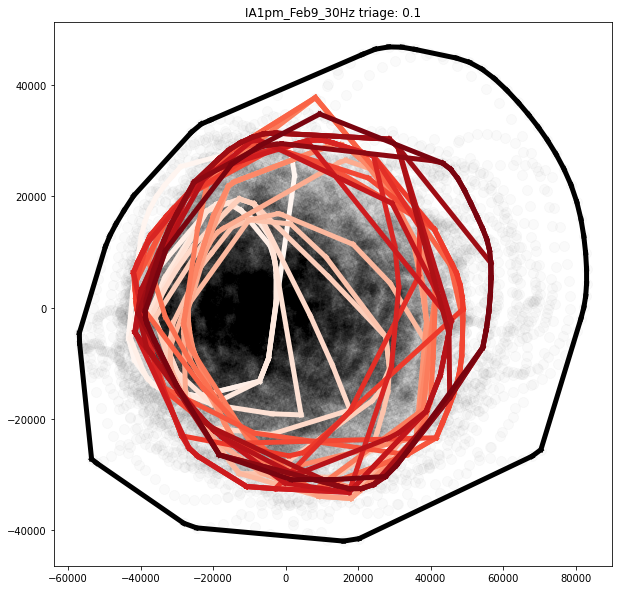

In [5]:
#############################################################################
##### COMPUTE PCA SCATTER PLOTS OF CONVEX HULL FOR SPECIFIC ANIMAL + DAY ####
#############################################################################

# NEW VERSION: SHOWS CONVEX HULL FROM TIME POINT T1 to T2
 
def generate_convex_hulls(pa):

    #pa.plot_all = True
    pa.plot_3D = False
    pa.alpha1 = 1.0
    pa.alpha2 = 0.02
    pa.knn_triage = .1
    pa.knn_triage_based_on_last_point = False           # this flag removes all traces based on t=0 triaging
                                                        # basically we use the outliers at t=0 to triage other time points;
    pa.cmap = matplotlib.cm.get_cmap('jet')
    pa.linewidth = 5
    pa.t0_hull = False
    pa.t0_dynamics = False
    pa.plot_dynamics = False


    #############################
    visualize.plot_pca_scatter(pa)

    plt.title(session+ " triage: "+ (str(pa.knn_triage)))


#########################################
animal_ids = ['IA1']

#session = 'IJ2pm_Mar31_30Hz'
session = 'IA1pm_Feb9_30Hz'


# 
animal_id = animal_ids[0]


#
t1 = np.arange(30,310,10)
t2 = np.arange(0,270,10)


# 
cmap = matplotlib.cm.get_cmap('Reds', len(t1))   


fig =plt.figure(figsize=(10,10))
ctr=0
for t1,t2 in zip(t1,t2):
    print ("Times: ", t1,t2)
    
    pa = visualize.PCA_Analysis()
    pa.root_dir = '/media/cat/4TBSSD/yuki/'
    pa.animal_id = animal_id

    # 
    pa.use_pca_data = True    # this uses the PCA denoised STMs not Raw data!
    pa.recompute = True
    pa.n_pca = 20
    pa.sliding_window = 30    # how many frames to take into analysis window
    pa.n_frames = 30          # how many frames back in time to analyze: 
    pa.session = session

    # 
    #print ("loading data and triggers")
    pa.X, pa.triggers = visualize.get_data_and_triggers(pa)

    #print (pa.X.shape)

    # 
    #print ("loading pca and all points")
    pa.pca, pa.all_points = visualize.get_pca_object_and_all_points(pa)

    # FIG 2 E top
    #print ("projecting data")
    pa.t1 = t1
    pa.t2 = t2
    pa.p_lever =  visualize.project_data_pca2(pa)

    if t1 ==30:
        pa.plot_all=True
    else:
        pa.plot_all=False
        
    pa.hull_clr = cmap(ctr)
        
    generate_convex_hulls(pa)

    ctr+=1
    
##########################################################
##########################################################
##########################################################
if False:
    #plt.savefig('/home/cat/scatter_convex.svg')
    plt.savefig('/home/cat/scatter_convex_'+str(pa.t1)+"_"+str(pa.t2)+'.png',dpi=600)
    plt.close()
else:
    plt.show()



In [109]:
# MAKE COLORBAR
# a = np.array([[0,1]])
# plt.figure(figsize=(9, 1.5))
# img = plt.imshow(a, cmap="viridis")
# plt.gca().set_visible(False)
# cax = plt.axes([0.1, 0.2, 0.8, 0.6])
# plt.colorbar(orientation="horizontal", cax=cax)
# plt.savefig("/home/cat/colorbar.png")
# plt.close()

(27,)


100%|██████████| 38908/38908 [00:00<00:00, 983220.45it/s]

fname all points:  /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz_all_points.npy
pa shape:  (39508, 30)
 X data using :  30  number of frames  (38908, 900)


 done fit 
all points denoised:  (38908, 20)


 25%|██▌       | 76/300 [00:00<00:00, 751.62it/s]

300 44 20


  0%|          | 0/300 [00:00<?, ?it/s]

temp points:  (38908, 3)
# points kept:  (38869,)  of total:  38908
computing convex hull # dim:  3 (38869, 3)
p lever:  (300, 44, 20)


100%|██████████| 300/300 [00:08<00:00, 37.25it/s]


(300, 10)
(300,)
(300,) (300,)


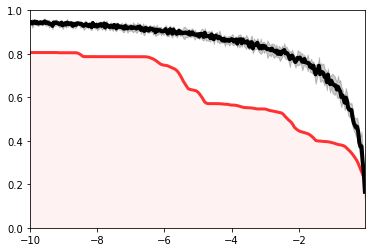

In [11]:
#####################################################
####### COMPUTE AND PLOT CONVEX HULL DYNAMICS #######
#####################################################

# FIG 2E

pa = visualize.PCA_Analysis()
pa.root_dir = '/media/cat/4TBSSD/yuki/'
pa.animal_id = animal_id

# 
pa.use_pca_data = True    # this uses the PCA denoised STMs not Raw data!
pa.recompute = True
pa.n_pca = 20
pa.sliding_window = 30    # how many frames to take into analysis window
pa.n_frames = 300          # how many frames back in time to analyze: 
pa.session = session

# 
#print ("loading data and triggers")
pa.X, pa.triggers = visualize.get_data_and_triggers(pa)

#print (pa.X.shape)

# 
#print ("loading pca and all points")
pa.pca, pa.all_points = visualize.get_pca_object_and_all_points(pa)

# FIG 2 E top
#print ("projecting data")
pa.t1 = 300
pa.t2 = 270
pa.p_lever =  visualize.project_data_pca2(pa)

# 
pa = visualize.get_convex_hull(pa)

#  
pa.t0_hull = False
pa.t0_dynamics = False
pa.plot_dynamics = False

visualize.plot_convex_hull(pa)
plt.show()
#plt.savefig('/home/cat/convex_hull_traces.svg',dpi=1200)
#plt.close()

In [59]:
# # UMAP ON DATA
X_U = []
X_U.append(X_lever)
X_U.append(X_random)
X_U.append(X_shifted)
X_U = np.vstack(X_U)
print ("XU_:", X_U.shape)

import umap
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

#fit = umap.UMAP()
%time umap_3d.fit(X_U[::10])
u = umap_3d.transform(X_U)

print ("Umap output: ", u.shape)


XU_: (339, 491520)
CPU times: user 1min 6s, sys: 1.09 s, total: 1min 7s
Wall time: 1min 7s
Umap output:  (339, 3)


In [61]:
fig=plt.figure()
#ax = plt.subplot(111)
ax = fig.add_subplot(projection='3d')
ax.scatter(
           u[:p_lever.shape[0],0], 
           u[:p_lever.shape[0],1],
           u[:p_lever.shape[0],2],
            c='red',
            s=100,
            edgecolor = 'black', alpha=1)

ax.scatter(
           u[p_lever.shape[0]:p_lever.shape[0]+p_random.shape[0],0], 
           u[p_lever.shape[0]:p_lever.shape[0]+p_random.shape[0],1], 
           u[p_lever.shape[0]:p_lever.shape[0]+p_random.shape[0],2], 
            c='black',
            s=100,
            edgecolor = 'black', alpha=1)

ax.scatter(
           u[p_lever.shape[0]+p_random.shape[0]:,0], 
           u[p_lever.shape[0]+p_random.shape[0]:,1], 
           u[p_lever.shape[0]+p_random.shape[0]:,2], 
    
            c='pink',
            s=100,
            edgecolor = 'black', alpha=1)
plt.show()

(13,) (13,)
[  46.373909    229.03753495  245.04675794  247.31242704  307.61410499
  328.63516998  752.77175403  846.9566381   973.14472914  976.04501009
 1036.49321198 1051.39299798 1156.04846096]


[b'0' b'0' b'0' ... b'0' b'0' b'0']
[0. 0. 0. ... 0. 0. 0.]
